In [2]:
import pandas as pd                         #importing pandas as pd
import numpy as np                          #importing nmpy as np
import seaborn as sns                       #importing seaborn as sns
import matplotlib.pyplot as plt             #importing matplotlib.pyplot as plt
import scipy                                #impoting scipy
from scipy import interpolate as interp1d   #importing interpolate from scipy library as interp1d
from forex_python.converter import CurrencyRates

In [3]:
                                            # Provide the path for CSV file
csv_file_path = 'ProductPriceIndex.csv'     # Replace with the actual path to CSV file
df = pd.read_csv(csv_file_path)             # Use read_csv to read the data from the CSV file into a DataFrame

In [5]:
print(df)                                   #printing the dataframe

            productname        date farmprice atlantaretail chicagoretail  \
0          Strawberries  2019-05-19     $1.16         $2.23         $1.70   
1       Romaine Lettuce  2019-05-19     $0.35         $1.72         $2.00   
2      Red Leaf Lettuce  2019-05-19     $0.32         $1.84         $1.84   
3              Potatoes  2019-05-19     $1.50         $5.32         $5.14   
4               Oranges  2019-05-19     $0.41         $1.42         $1.45   
...                 ...         ...       ...           ...           ...   
15761   Broccoli Crowns  1999-10-24     $0.29         $1.46         $0.00   
15762  Broccoli Bunches  1999-10-24     $0.23         $1.21         $0.00   
15763       Cauliflower  1999-10-24     $0.19         $1.01         $0.00   
15764           Carrots  1999-10-24     $0.12         $0.64         $0.00   
15765        Cantaloupe  1999-10-24     $0.21         $0.54         $0.00   

      losangelesretail newyorkretail averagespread  
0                $1.99

In [26]:
print("First five record of this dataframe: ")  #printing first five record
df.head()                                       #df.head() will fetch the first five rows by default

First five record of this dataframe: 


,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [10]:
print("Last five record of this dataframe: ")  #printing last five record
df.tail()                                      #df.tail() will fetch the last five records

Last five record of this dataframe: 


,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
15761,Broccoli Crowns,1999-10-24,$0.29,$1.46,$0.00,$0.97,$1.15,208.62%
15762,Broccoli Bunches,1999-10-24,$0.23,$1.21,$0.00,$0.84,$1.10,242.39%
15763,Cauliflower,1999-10-24,$0.19,$1.01,$0.00,$0.75,$0.92,252.63%
15764,Carrots,1999-10-24,$0.12,$0.64,$0.00,$0.84,$0.59,331.25%
15765,Cantaloupe,1999-10-24,$0.21,$0.54,$0.00,$0.56,$0.79,125.00%


In [28]:
print("Shape of this dataframe: ")             #printing the data shape
df.shape                                       #shaping the dataframe

Shape of this dataframe: 


(15766, 8)

In [29]:
print("The number of unique item:")
df.nunique()                                   # the number of unique items in the dataset

The number of unique item:


productname            22
date                 1019
farmprice             316
atlantaretail         528
chicagoretail         458
losangelesretail      436
newyorkretail         406
averagespread       10492
dtype: int64

In [30]:
print("Description of this dataframe:")
df.describe(include='all')                   #to generate summary statistics for numeric columns in a DataFrame 

Description of this dataframe:


,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
count,15766,15766,15766,15766,15766,15766,15766,15766
unique,22,1019,316,528,458,436,406,10492
top,Broccoli Crowns,2012-08-12,$0.21,$1.32,$0.00,$0.99,$1.99,250.00%
freq,1017,37,408,243,1103,475,547,37


In [31]:
print("Description of this dataframe:")
df.describe().T                               #Here T means transpose. Transposed the data 

Description of this dataframe:


,count,unique,top,freq
productname,15766,22,Broccoli Crowns,1017
date,15766,1019,2012-08-12,37
farmprice,15766,316,$0.21,408
atlantaretail,15766,528,$1.32,243
chicagoretail,15766,458,$0.00,1103
losangelesretail,15766,436,$0.99,475
newyorkretail,15766,406,$1.99,547
averagespread,15766,10492,250.00%,37


In [9]:
print("check null value present or not:")      # printing the null value
df.isnull().sum()                              # check for missing values

check null value present or not:


productname         0
date                0
farmprice           0
atlantaretail       0
chicagoretail       0
losangelesretail    0
newyorkretail       0
averagespread       0
dtype: int64

In [32]:
print("Data type of the dataframe: ") #printing all information about the data frame
df.info()                      #to know the columns and their corresponding data types along with finding whether they contain null values or not

Data type of the dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   productname       15766 non-null  object
 1   date              15766 non-null  object
 2   farmprice         15766 non-null  object
 3   atlantaretail     15766 non-null  object
 4   chicagoretail     15766 non-null  object
 5   losangelesretail  15766 non-null  object
 6   newyorkretail     15766 non-null  object
 7   averagespread     15766 non-null  object
dtypes: object(8)
memory usage: 985.5+ KB


In [20]:
print("Number of duplicate rows:")
df.duplicated().sum()        # Calculate the number of duplicates across all column   

Number of duplicate rows:


51

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
df.tail()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
15761,Broccoli Crowns,1999-10-24,$0.29,$1.46,$0.00,$0.97,$1.15,208.62%
15762,Broccoli Bunches,1999-10-24,$0.23,$1.21,$0.00,$0.84,$1.10,242.39%
15763,Cauliflower,1999-10-24,$0.19,$1.01,$0.00,$0.75,$0.92,252.63%
15764,Carrots,1999-10-24,$0.12,$0.64,$0.00,$0.84,$0.59,331.25%
15765,Cantaloupe,1999-10-24,$0.21,$0.54,$0.00,$0.56,$0.79,125.00%


In [25]:
print(" Sorting value:")
df.sort_values(by=['productname'])              #sorting the values using the productname

 Sorting value:


,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
9841,Asparagus,2007-01-07,$3.13,$3.32,$3.71,$4.09,$3.69,18.29%
3976,Asparagus,2014-04-07,$1.79,$2.86,$2.99,$3.12,$3.11,68.72%
5531,Asparagus,2012-04-01,$1.46,$2.24,$1.99,$2.74,$2.04,54.28%
5518,Asparagus,2012-04-08,$1.37,$2.99,$3.37,$3.24,$3.12,132.12%
13196,Asparagus,2003-01-26,$0.89,$3.20,$2.87,$2.91,$3.24,243.26%
...,...,...,...,...,...,...,...,...
12921,Tomatoes,2003-06-01,$0.00,$1.65,$2.36,$2.14,$1.59,0.00%
7629,Tomatoes,2009-08-16,$0.55,$1.59,$2.19,$1.99,$1.99,252.73%
7652,Tomatoes,2009-08-09,$0.55,$1.92,$2.19,$2.49,$2.12,296.36%
7545,Tomatoes,2009-09-20,$0.34,$1.82,$2.32,$2.24,$1.87,506.62%


In [17]:
# convert the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

# extract the day, month, and year components
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# show the modified data frame
df.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread,Day,Month,Year
0,Strawberries,2019-05-19,1.16,$2.23,$1.70,$1.99,$2.54,82.33%,19,5,2019
1,Romaine Lettuce,2019-05-19,0.35,$1.72,$2.00,$1.69,$1.99,428.57%,19,5,2019
2,Red Leaf Lettuce,2019-05-19,0.32,$1.84,$1.84,$1.69,$1.89,467.19%,19,5,2019
3,Potatoes,2019-05-19,1.50,$5.32,$5.14,$3.99,$6.22,244.50%,19,5,2019
4,Oranges,2019-05-19,0.41,$1.42,$1.45,$1.34,$2.05,281.71%,19,5,2019


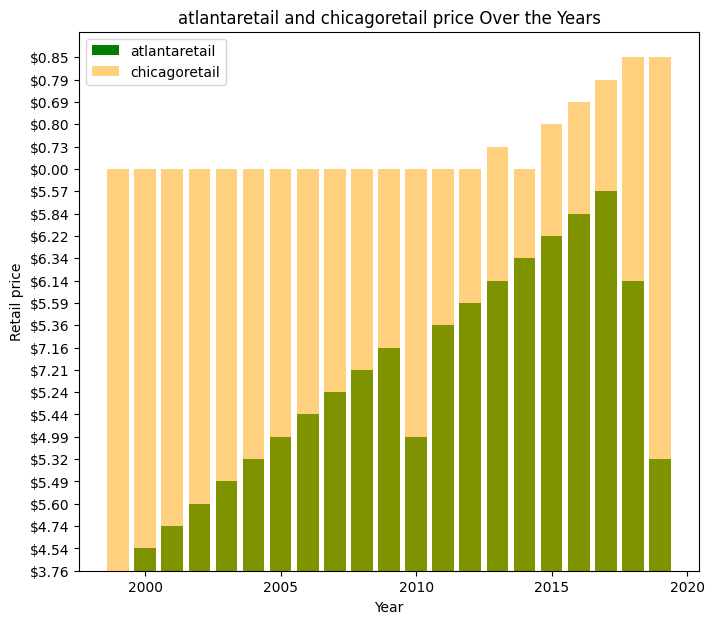

In [23]:
# Group by Year and find the maximum High and minimum Low values for each year
max_high_per_year = df.groupby('Year')['atlantaretail'].max()
min_low_per_year = df.groupby('Year')['chicagoretail'].min()

# Plotting
plt.figure(figsize=(8, 7))

# Bar plot for highest stock price over the years
plt.bar(max_high_per_year.index, max_high_per_year.values, color='green', label='atlantaretail')
# Bar plot for lowest stock price over the years
plt.bar(min_low_per_year.index, min_low_per_year.values, color='orange', label='chicagoretail', alpha=0.5)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Retail price')
plt.title('atlantaretail and chicagoretail price Over the Years')
plt.legend()

# Show the plot
plt.show()

In [64]:
pd.pivot_table(df,index=['productname'],values=['averagespread'],aggfunc=[np.sum],fill_value=0)

C:\Users\user\AppData\Local\Temp\ipykernel_13888\519303684.py:1: FutureWarning: The provided callable <function sum at 0x00000123388B3CE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,index=['productname'],values=['averagespread'],aggfunc=[np.sum],fill_value=0)


,sum
,averagespread
productname,
Asparagus,-12.96%14.30%15.49%28.91%10.98%24.40%22.43%83....
Avocados,30.49%22.97%53.47%56.65%59.22%44.03%15.47%-2.3...
Broccoli Bunches,42.89%34.65%100.00%220.18%153.08%92.53%67.52%4...
Broccoli Crowns,148.97%130.25%86.02%89.90%149.67%344.02%309.18...
Cantaloupe,120.40%99.29%118.60%149.54%203.31%209.64%195.9...
Carrots,328.13%243.33%245.83%238.33%237.50%240.52%235....
Cauliflower,198.98%37.32%12.84%8.90%73.09%184.32%237.50%24...
Celery,-18.20%-22.80%-12.20%-14.35%-23.49%-25.00%-20....


In [69]:
round(pd.pivot_table(df, index=['atlantaretail','chicagoretail','losangelesretail','newyorkretail'],columns=['productname'],values=['averagespread'],aggfunc=['sum','min','max'],fill_value=0, margins=True),3)

sum  \
                                                                                                averagespread   
productname                                                                                         Asparagus   
atlantaretail chicagoretail losangelesretail newyorkretail                                                      
$             $1.92         $1.99            $1.72                                                          0   
$0.00         $0.00         $0.00            $0.00                                                   -100.00%   
                                             $0.28                                                          0   
                                             $0.33                                                          0   
                                             $0.51                                                          0   
...                                                                                                       ...   
$6.74         $4.82         $4.49            $6.99                                                          0   
              $5.87         $4.49            $0.00                                                          0   
$7.16         $5.16         $4.99            $0.00                                                          0   
$7.21         $6.24         $3.99            $0.00                                                          0   
All                                                         -12.96%14.30%15.49%28.91%10.98%24.40%22.43%83....   

                                                                                                               \
                                                                                                                
productname                                                                                          Avocados   
atlantaretail chicagoretail losangelesretail newyorkretail                                                      
$             $1.92         $1.99            $1.72                                                          0   
$0.00         $0.00         $0.00            $0.00                                                   -100.00%   
                                             $0.28                                                          0   
                                             $0.33                                                          0   
                                             $0.51                                                          0   
...                                                                                                       ...   
$6.74         $4.82         $4.49            $6.99                                                          0   
              $5.87         $4.49            $0.00                                                          0   
$7.16         $5.16         $4.99            $0.00                                                          0   
$7.21         $6.24         $3.99            $0.00                                                          0   
All                                                         30.49%22.97%53.47%56.65%59.22%44.03%15.47%-2.3...   

                                                                                                               \
                                                                                                                
productname                                                                                  Broccoli Bunches   
atlantaretail chicagoretail losangelesretail newyorkretail                                                      
$             $1.92         $1.99            $1.72                                                          0   
$0.00         $0.00         $0.00            $0.00                                                   -100.00%   
                                    

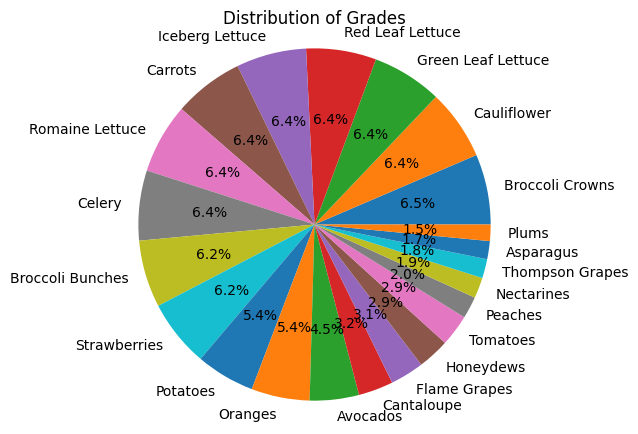

In [18]:
productname_count = df['productname'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(productname_count, labels=productname_count.index, autopct='%1.1f%%')
plt.title('Distribution of Grades')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: title={'center': 'Year Wise Sales'}, xlabel='Year'>

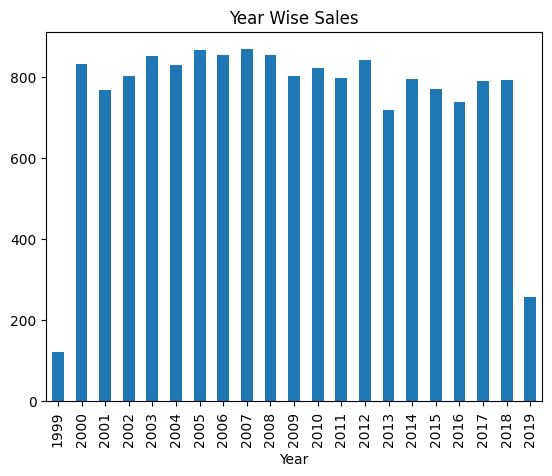

In [28]:
# what was the best year of sales
df.groupby('Year')['farmprice'].count().plot(kind='bar',title='Year Wise Sales')